# Deep Learning in Medicine - Spring 2022
### BMSC-GA 4493, BMIN-GA 3007 
### Homework 2
#### Sanjay Subramanian


**Note:** If you need to write mathematical terms, you can type your answeres in a Markdown Cell via LaTex 

See: <a href="https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook">here</a> if you have issues. To see basic LaTex notation see: <a href="https://en.wikibooks.org/wiki/LaTeX/Mathematics"> here </a>.

**Submission instruction**: Upload and Submit a zipped folder named netid_hw2 consisting of your final jupyter notebook and necessary files in <a href='https://brightspace.nyu.edu/d2l/home/158477'>Brightspace</a>. If you use code or script from web, please give a link to the code in your answers. Not providing the reference of the code used will reduce your points!!

**Submission deadline: Thursday March 25th 2022 --> No Extensions!!**

# Question 1: Convolutional Layer  (Total 20 points)

We have a 3x5x5 image (3 channels) and three 3x3x3 convolution kernels as pictured. Bias term for each feature map is also provided. For the questions below, please provide the feature/activation maps requested, please provide the python code that you used to calculate the maps

Hint: An image tensor should be [batch size, channels, height, weight], kernels/filters tensor should be [number of filters (output channels), filter_size_1 (input channels), filter_size_2, filter_size_3].

<img src="HW2_picture1.png">

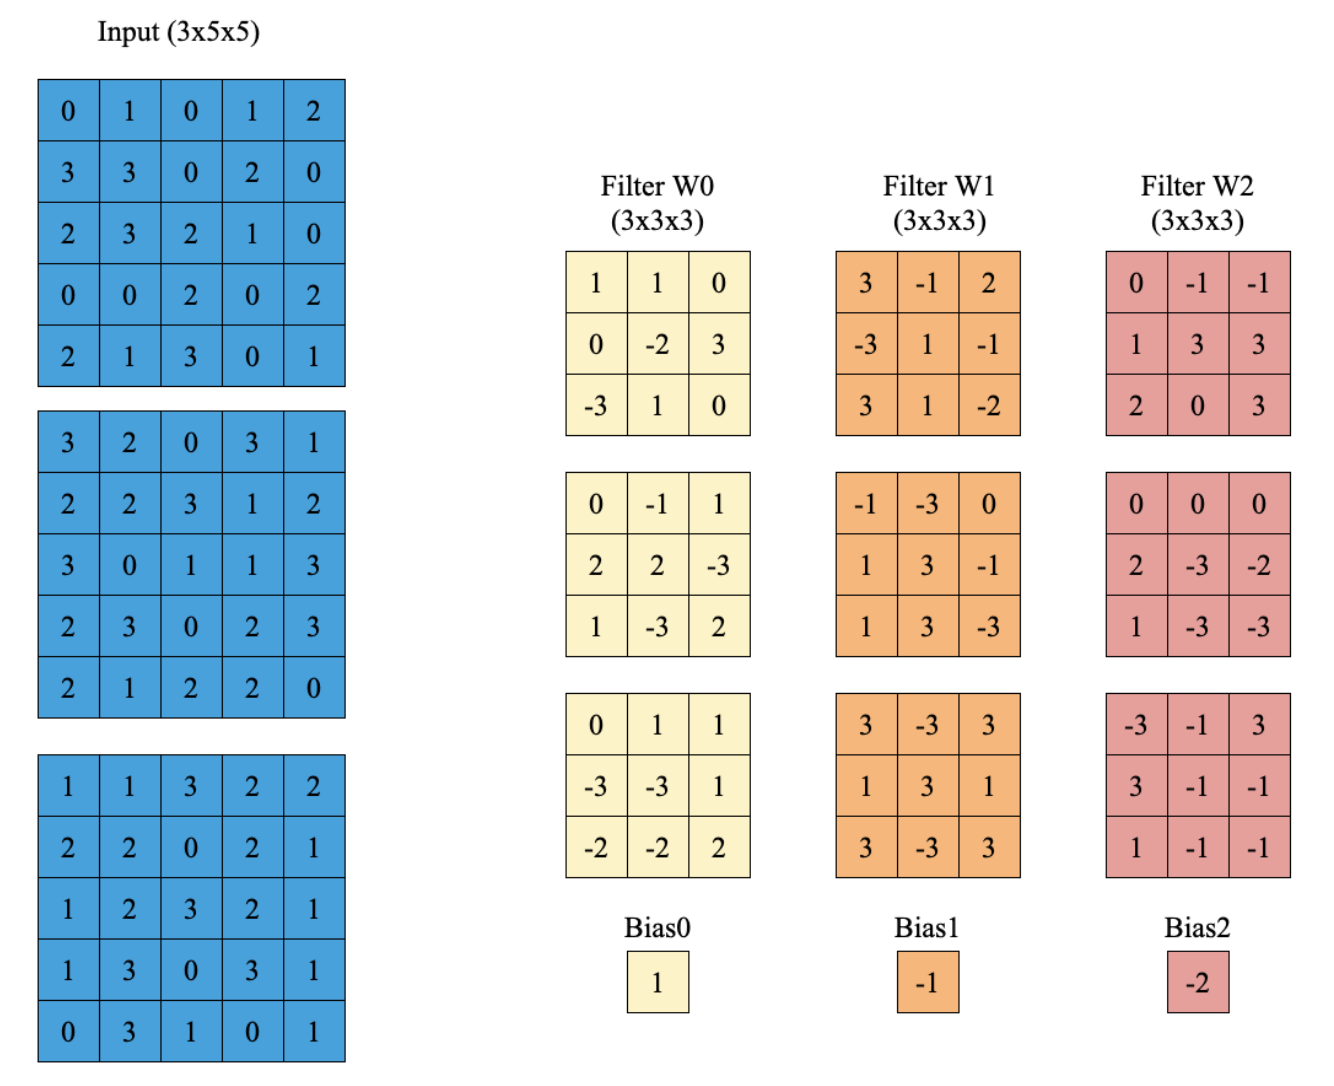## 1.1) 
What will be the dimension of the feature maps after we forward propogate the image using the given convolution kernels for

### 1.1.a) (1 point)
stride=1, without zero padding?

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import tensorflow as tf
from tensorflow import keras
import torch.nn.functional as F
import torch.nn as nn
import torch
import time

In [387]:
if torch.cuda.is_available:
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(3, kernel_size=3, input_shape=(5, 5, 3)))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 3, 3, 3)           84        
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


O = (W + 2*P - D*(F-1) - 1)/S + 1 <br>
O = (5 + 2*0 - 1*(3-1) - 1)/1 + 1 <br>
O = (H,W,C) = (3,3,3)

### 1.1.b) (1 point) 
stride=2, padding = 2?

O = (W + 2*P - D*(F-1) - 1)/S + 1 <br>
O = (5 + 2*2 - 1*(3-1) - 1)/2 + 1 <br>
O = (H,W,C) = (4,4,3)

### 1.1.c) (1 point)
stride=3, padding = 2?

O = (W + 2*P - D*(F-1) - 1)/S + 1 <br>
O = (5 + 2*2 - 1*(3-1) - 1)/3 + 1 <br>
O = (H,W,C) = (3,3,3)

### 1.1.d) (1 point) 
a dilated convolution with stride=1, dilation rate=2 and zero padding?

O = (W + 2*P - D*(F-1) - 1)/S + 1 <br>
O = (5 + 2*0 - 2*(3-1) - 1)/1 + 1 <br>
O = (H,W,C) = (1,1,3)

## 1.2) (6 points)
Use the pytorch package to calculate feature/activation maps. Write a code which takes 3x5x5 image and performs a 2D convolution operation (with stride = 1 and zero padding) using 3x3x3 filters provided on the picture. After convolution layer use leaky ReLU activation function (with negative slope 0.01) and Max-Pooling operation with required parameters to finally obtain output of dimension 2x1x1. Provide the code, feature maps obtained from convolution operation, activation maps, and feature maps after Max-Pooling operation.

**Hint:** You can refer to [AdaptiveMaxPool2d](https://pytorch.org/docs/stable/nn.html#adaptivemaxpool2d) to get desired dimension output from Pooling layer.

In [1]:
# starter code to load image:x, kernel weights:w and bias:b
import numpy as np
x = np.load('q1_input.npy')
w = np.load('q1_Filters.npy')
b = np.load('q1_biases.npy')

In [69]:
conv2d_layer = nn.Conv2d(in_channels=3,  #Input channels
                         out_channels=3, #Output channels
                         kernel_size=3, #Kernel/Filter size
                         stride=1, #Stride
                         padding=0, #Padding; In this case it's zero padding
                         bias=True)
out = conv2d_layer(torch.from_numpy(x).type(torch.FloatTensor).unsqueeze(0))
out.shape

torch.Size([1, 3, 3, 3])

In [76]:
xt = torch.from_numpy(x).type(torch.FloatTensor).unsqueeze(0)
wt = torch.from_numpy(w).type(torch.FloatTensor)
bt = torch.from_numpy(b).type(torch.FloatTensor)

In [148]:
conv = F.conv2d(xt, wt, bt, stride=1, padding=0)
conv

tensor([[[[-13.,   5., -12.],
          [ -8.,  -2., -24.],
          [ 10.,  -8., -11.]],

         [[ 16.,  17.,  23.],
          [  5.,  37., -13.],
          [ 22.,  30.,  32.]],

         [[ 16.,   3., -15.],
          [  3.,   1.,  -8.],
          [  0.,  -1., -14.]]]])

In [145]:
relu = F.leaky_relu(conv)
relu

tensor([[[[-1.3000e-01,  5.0000e+00, -1.2000e-01],
          [-8.0000e-02, -2.0000e-02, -2.4000e-01],
          [ 1.0000e+01, -8.0000e-02, -1.1000e-01]],

         [[ 1.6000e+01,  1.7000e+01,  2.3000e+01],
          [ 5.0000e+00,  3.7000e+01, -1.3000e-01],
          [ 2.2000e+01,  3.0000e+01,  3.2000e+01]],

         [[ 1.6000e+01,  3.0000e+00, -1.5000e-01],
          [ 3.0000e+00,  1.0000e+00, -8.0000e-02],
          [ 0.0000e+00, -1.0000e-02, -1.4000e-01]]]])

In [146]:
pool = nn.AdaptiveMaxPool3d((3,1,1))
output = pool(relu)
output

tensor([[[[10.]],

         [[37.]],

         [[16.]]]])

In [136]:
output.squeeze(0).shape

torch.Size([3, 1, 1])

## 1.3) (7 points)
Use the pytorch package to calculate feature/activation maps of a residual unit as depicted in Figure 2 of https://arxiv.org/pdf/1512.03385.pdf as well as on the figure above.


<img src="HW2_picture2.png" width="150">

Write a code which takes 3x5x5 input image and performs two 2D convolution operations using the filters provided on the figure. Please use the three 3x3x3 filters for the two Convolution layers. You need to set a suitable padding size for the convolution operations. After the convolution layers and after the residual addition use ReLU activation function. Provide the code and feature maps obtained from each convolution operation, activation maps, and the last activation map obtained from the residual unit.

In [169]:
out = F.conv2d(xt, wt, bt, stride=1, padding=0)
out

tensor([[[[-13.,   5., -12.],
          [ -8.,  -2., -24.],
          [ 10.,  -8., -11.]],

         [[ 16.,  17.,  23.],
          [  5.,  37., -13.],
          [ 22.,  30.,  32.]],

         [[ 16.,   3., -15.],
          [  3.,   1.,  -8.],
          [  0.,  -1., -14.]]]])

In [170]:
out = F.relu(out)
out

tensor([[[[ 0.,  5.,  0.],
          [ 0.,  0.,  0.],
          [10.,  0.,  0.]],

         [[16., 17., 23.],
          [ 5., 37.,  0.],
          [22., 30., 32.]],

         [[16.,  3.,  0.],
          [ 3.,  1.,  0.],
          [ 0.,  0.,  0.]]]])

In [171]:
out = F.conv2d(xt, wt, bt, stride=1, padding=1)
out

tensor([[[[  3.,  -6., -25.,  -1., -24.],
          [ -6., -13.,   5., -12., -15.],
          [ 22.,  -8.,  -2., -24., -12.],
          [  2.,  10.,  -8., -11.,  -5.],
          [  9.,   0., -10.,  17.,   0.]],

         [[  6.,  27.,  31.,  16.,  28.],
          [ 12.,  16.,  17.,  23.,  16.],
          [ 12.,   5.,  37., -13.,  32.],
          [ 18.,  22.,  30.,  32.,  14.],
          [  8.,  -9.,  23.,  -3.,  -2.]],

         [[-21.,  -7.,   0.,  -8.,  12.],
          [  0.,  16.,   3., -15., -14.],
          [-20.,   3.,   1.,  -8., -15.],
          [-27.,   0.,  -1., -14.,   1.],
          [  4.,  -3.,   6.,   2.,  -8.]]]])

In [172]:
out = out+xt
out

tensor([[[[  3.,  -5., -25.,   0., -22.],
          [ -3., -10.,   5., -10., -15.],
          [ 24.,  -5.,   0., -23., -12.],
          [  2.,  10.,  -6., -11.,  -3.],
          [ 11.,   1.,  -7.,  17.,   1.]],

         [[  9.,  29.,  31.,  19.,  29.],
          [ 14.,  18.,  20.,  24.,  18.],
          [ 15.,   5.,  38., -12.,  35.],
          [ 20.,  25.,  30.,  34.,  17.],
          [ 10.,  -8.,  25.,  -1.,  -2.]],

         [[-20.,  -6.,   3.,  -6.,  14.],
          [  2.,  18.,   3., -13., -13.],
          [-19.,   5.,   4.,  -6., -14.],
          [-26.,   3.,  -1., -11.,   2.],
          [  4.,   0.,   7.,   2.,  -7.]]]])

In [173]:
out = F.relu(out)
out

tensor([[[[ 3.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  5.,  0.,  0.],
          [24.,  0.,  0.,  0.,  0.],
          [ 2., 10.,  0.,  0.,  0.],
          [11.,  1.,  0., 17.,  1.]],

         [[ 9., 29., 31., 19., 29.],
          [14., 18., 20., 24., 18.],
          [15.,  5., 38.,  0., 35.],
          [20., 25., 30., 34., 17.],
          [10.,  0., 25.,  0.,  0.]],

         [[ 0.,  0.,  3.,  0., 14.],
          [ 2., 18.,  3.,  0.,  0.],
          [ 0.,  5.,  4.,  0.,  0.],
          [ 0.,  3.,  0.,  0.,  2.],
          [ 4.,  0.,  7.,  2.,  0.]]]])

In [174]:
out.shape

torch.Size([1, 3, 5, 5])

# 1.4 (3 points)
Provide reasons as to why densenets exhibit  parameter efficiency (work well with lower number of parameters). 
https://arxiv.org/pdf/1608.06993.pdf

1. implicit deep supervision: individual layers receive additional supervision from the loss function through shorter connections - implicitly, a single classifier on top of the network provides direct supervision to all layers through at most two or three transition layers.
2. feature reuse: DenseNets allow layers access to feature-maps from all of its preceding layers - there is no need to relearn redundant feature maps.
3. dense connections have a regularizing effect, which also improves overfitting.

# Question 2: Network design parameters for disease classification (Total 15 points)

Disease classification is a common problem in medicine. There are many ways to solve this problem. Goal of this question is to make sure that you have a clear picture in your mind about possible techniques that you can use in such a classification task.

Assume that we have a 10K images in a dataset of computed tomography (CTs). For each image, the dimension is 64x128x128 and we have the label for each image. The label of each image defines which class the image belongs (lets assume we have 4 different disease classes in total). You will describe your approach of classifying the disease for the techniques below. Make sure you do not forget the bias term. You can either design your proposed network by explaining it explicitely or you can provide the pytorch code which designs the network for questions 2.1.a, 2.2.a, and 2.3.a


In [185]:
# starter code
import torch
# you can generate a random image tensor for batch_size 8
x = torch.Tensor(8,64,128,128).normal_().type(torch.FloatTensor)

### 2.1.a) (2 points)
Design a multi layer perceptron (MLP) with a two hidden layer which takes an image as input (by reshaping it to a vector: lets call this a vectorized image). Our network has to first map the vectorized images to a vector of 512, then to 128 in the second hidden layer and finally feeds this vector to a fully connected layer to get the probability of 4 tissue classes. 

In [186]:
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim=4):
        super().__init__()
        self.hidden_1 = nn.Linear(input_dim, 512)
        self.hidden_2 = nn.Linear(512, 128)
        self.fc = nn.Linear(128, output_dim)

    def forward(self, x):
        # x = [batch size, channels, height, width]
        batch_size = x.shape[0]
        x = x.view(batch_size, -1)
        # x = [batch size, channels * height * width]
        h_1 = F.relu(self.hidden_1(x))
        # h_1 = [batch size, 512]
        h_2 = F.relu(self.hidden_2(h_1))
        # h_2 = [batch size, 128]
        y_pred = self.fc(h_2)
        # y_pred = [batch size, output dim]
        return y_pred, h_2
    
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

### 2.1.b) (2 points)
Clearly mention the sizes for your input and output at each layer until you get final output vector with 4 tissue classes in 64x128x128 voxels

In [187]:
model = MLP(64*128*128)
model

MLP(
  (hidden_1): Linear(in_features=1048576, out_features=512, bias=True)
  (hidden_2): Linear(in_features=512, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=4, bias=True)
)

- input dim: [8,64,128,128] (batch size 8) --> flatten [8,1048576]
- hidden1 dim: [8,1048576] --> [8,512]
- hidden2 dim: [8,512] --> [8,128]
- fc dim: [8,128] --> [8,4]

### 2.1.c) (1 points)
How many parameters you need to fit for your design? How does adding another hidden layer (64 neurons) will effect the number of parameters to use?

In [188]:
count_parameters(model)

536937604

In [195]:
## sanity check 
(1048576+1)*512 + (512+1)*128 + (128+1)*4

536937604

In [197]:
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim=4):
        super().__init__()
        self.hidden_1 = nn.Linear(input_dim, 512)
        self.hidden_2 = nn.Linear(512, 128)
        self.hidden_3 = nn.Linear(128, 64)
        self.fc = nn.Linear(64, output_dim)

    def forward(self, x):
        # x = [batch size, channels, height, width]
        batch_size = x.shape[0]
        x = x.view(batch_size, -1)
        # x = [batch size, channels * height * width]
        h_1 = F.relu(self.hidden_1(x))
        # h_1 = [batch size, 512]
        h_2 = F.relu(self.hidden_2(h_1))
        # h_2 = [batch size, 128]
        h_3 = F.relu(self.hidden_3(h_2))
        # h_3 = [batch size, 64]
        y_pred = self.fc(h_3)
        # y_pred = [batch size, output dim]
        return y_pred, h_3

model = MLP(64*128*128)
print(model)
count_parameters(model)

MLP(
  (hidden_1): Linear(in_features=1048576, out_features=512, bias=True)
  (hidden_2): Linear(in_features=512, out_features=128, bias=True)
  (hidden_3): Linear(in_features=128, out_features=64, bias=True)
  (fc): Linear(in_features=64, out_features=4, bias=True)
)


536945604

Adding the extra hidden layer increases the number of parameters by 8000

### 2.2.a) (2 points)
Design a one layer convolutional neural network which first maps the images to a vector of 256 (with the help of convolution and pooling operations) then feeds this vector to a fully connected layer to get the probability of 4 disease classes.

In [235]:
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim=4):
        super().__init__()
        self.layer1 = nn.Conv2d(64, 64, kernel_size = 3, stride = 4, padding = 1)
        self.fc = nn.Linear(256, 4)

    def forward(self, x):
        h_1 = F.max_pool2d(self.layer1(x), kernel_size = 2, stride = 2)
        print(h_1.shape)
        batch_size = x.shape[0]
        x = x.view(batch_size, -1)
        y_pred = self.fc(h_1)
        return y_pred, h_1
    
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

### 2.2.b) (2 points)
Clearly mention the sizes for your input, kernel, pooling, and output at each step until you get final output vector with 4 probabilities

In [241]:
model = MLP(64*128*128)
model

MLP(
  (layer1): Conv2d(64, 64, kernel_size=(3, 3), stride=(4, 4), padding=(1, 1))
  (fc): Linear(in_features=256, out_features=4, bias=True)
)

- input dim: [8,64,128,128] (batch size 8)
- conv2d dim: [8,64,128,128] --> [8,64,32,32]
- maxpool dim: [8,64,32,32] --> [8,64,16,16] --> flatten [8,256]
- fc dim: [8,256] --> [8,4]

### 2.2.c) (1 point) 
How many parameters you need to fit for your design?

In [233]:
count_parameters(model)

37956

### 2.2.d) (2 points)
Now increase your selected convolution kernel size by 4 in each direction. Describe the effect of using small vs large filter size during convolution. 

In [234]:
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim=4):
        super().__init__()
        self.layer1 = nn.Conv2d(64, 64, kernel_size = 7, stride = 4, padding = 1)
        self.fc = nn.Linear(256, 4)

    def forward(self, x):
        h_1 = F.max_pool2d(self.layer1(x), kernel_size = 2, stride = 2)
        # h_1 = [batch size, 512]
        # x = [batch size, channels, height, width]
        batch_size = x.shape[0]
        x = x.view(batch_size, -1)
        # x = [batch size, channels * height * width]
        y_pred = self.fc(h_1)
        # y_pred = [batch size, output dim]
        return y_pred, h_1
    
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

model = MLP(64*128*128)
print(model)

count_parameters(model)

MLP(
  (layer1): Conv2d(64, 64, kernel_size=(7, 7), stride=(4, 4), padding=(1, 1))
  (fc): Linear(in_features=256, out_features=4, bias=True)
)


201796

Increasing the size of the kernel increases the total number of parameters in the model, which adds more complexity. There are more learnable parameters, but maybe at the cost of finer details.

## 2.3) (3 points)
Explain your findings regading different types of neural networks and building blocks based on your observations from 2.1 and 2.2. 

It is clear that very minor changes in architecture can result in extreme changes in both results and number of parameters involved in the models, and things such as kernel size, padding, stride etc. can also heavily influence outcome. This makes it necessary to test a number of parameters and decide in the early stages which parameters/layers/architectures are most suitable for the problem statement or experiment at hand. Ideas such as how many layers and how deep each layer will get before the final fully connected layer need to be thought through, in addition to how granular kernel/pooling operations should be, which can be based on image coverage required on the input data.

# Question 3: Literature Review: ChestX-ray8 (Total 18 points)
Read this paper:

Pranav Rajpurkar, Jeremy Irvin, et al. 
CheXNet: Radiologist-Level Pneumonia Detection on Chest X-Rays with Deep Learning https://arxiv.org/abs/1711.05225


We are interested in understanding the task, the methods that is proposed in this paper, technical aspects of the implementation, and possible future work. After you read the full article answer the following questions. Describe your answers in your own words.  

## 3.1) (2 points) 
What type of learning algorithm is used (supervised, semi-supervised or unsupervised) for the classification? What is the reason for selecting this type of learning algorithm? 

In this experiment, the training and validation labels were sourced from the Wang paper, which used automated extraction methods on radiology reports to derive the ground truth. This stage consisted of supervised learning. In the testing phase, annotations from 4 independent Stanford radiologists were used as comparisons against CheXNet. Given the availability of the data annotations, supervised training makes sense for this experiment, especially since there are 14 distinct annotation possibilities. 

## 3.2) (3 points)
What type of convolutional neural network architectures were used in the paper? How does transfer learning from these architectures achieved?

CheXNet is a 121-layer Dense CNN (DenseNet), where the final fully connected layer is replaced by one that has a single output which is put through a sigmoid nonlinearity. The weights are initialized with weights from a model pretrained on ImageNet, and trained using Adam optimizer and minibatch sizes of 16. While there are some changes made to the architecture which are specific to this problem, the underlying approach uses transfer learning with the ImageNet dataset to facilitate training.

## 3.3) (2 points)
What is the loss function? 

The loss function used is binary weighted cross-entropy loss, which is appropriate in this binary case where the labels are positive or negative for pneumonia.

## 3.4) (3 points)

Was the learning rate used changed during the training? Explain the situations where changing the learning rate is a good idea?

The learning rate started at 0.001 and was decayed by a factor of 10 each time the validation loss plateaud. When it becomes apparent the model is unable to learn/reduce loss further, it may be a good idea to modulate learning rate to adapt the model to ensure arrival at an optimal set of weights.

## 3.5) (3 points)

What are the evaluation metrics used for model comparison in classification? Explain why those metrics were chosen?

F1 score was used to compare CheXNet predictions against predictions made by the four radiologists. A bootstrap was also performed to generate confidence intervals to assess statistical significance. F1 score is an appropriate metric over something like accuracy in this case, as the data imbalance is probably much more skewed toward the negative case due to the binarization of pneumonia positives. While maybe less interpretable than accuracy, F1 score provides the harmonic mean of precision and recall and allows for observation over the rate of false negatives.

## 3.6) (2 points)
Did the authors do any normalization to the data before feeding them to the model? If so, What's the purpose of doing so?

The images were downscaled to 224x224 and normalized based on the mean and standard deviation of the ImageNet database. Given the fact that the pretrained model weights are based on the ImageNet database, normalization to these values makes sense in order to adapt the "transfer" part of the transfer learning architecture. 

## 3.8) (3 points)

In the paper CAMs (class activation mappings) are used for visualisation. Can this method be used for any CNN ? Describe the architectural requirements for getting CAM visualisations.

For CAMs to be used, spatial information must be preserved, so certain architectures need to be in place, namely the removal of dense fully connected layers before the final fully connected layer and replacement with global average pooling in order to extract the activation maps. Therefore, this technique is not feasible for every CNN.

# Question 4: Deep CNN design for disease classification (Total 42 points)

In this part of the howework, we will focus on classifiying the lung disease using chest x-ray dataset provided by NIH (https://www.nih.gov/news-events/news-releases/nih-clinical-center-provides-one-largest-publicly-available-chest-x-ray-datasets-scientific-community). You should be familiar with the dataset after answering Question 3.

You need to use HPC for training part of this question, as your computer's CPU will not be fast enough to compute learning iterations. Please read the HPC instruction first. In case you use HPC, please have your code/scripts uploaded under the questions and provide the required plots and tables there as well. If you run the HW2 jupter script with Squash File System and Singularity on GCP, you can find the data under /images folder. We are interested in classifying pneumothorax, cardiomegaly and infiltration cases. By saying so we have 3 classes that we want to identify by modelling a deep CNN.

First, you need to work on Data_Entry_2017_v2020.csv file to identify cases/images that has infiltration, pneumothorax, and cardiomegaly. This file can be downloaded from https://nihcc.app.box.com/v/ChestXray-NIHCC

## 4.1) Train, Test, and Validation Sets (2 point)
Write a script to read data from Data_Entry_2017.csv and process to obtain 3 sets (train, validation and test). By using 'Finding Labels' column, define a class that each image belongs to, in total you can define 3 classes:
- 0 cardiomegaly
- 1 pneumothorax
- 2 infiltration

Generate a train, validation and test set by splitting the whole dataset containing specific classes (0, 1, and 2)  by 70%, 10% and 20%, respectively. Test set will not be used during modelling but it will be used to test your model's accuracy. Make sure you have similar percentages of different cases in each subset. Provide statistics of the number of classess in your subsets. (you do not need to think about splitting the sets based on subjects for this homework. In general, we do not want images from the same subject to appear in both train and test sets!!) 

Write a .csv files defining the samples in your train, validation and test set with names: train.csv, validation.csv, and test.csv. Submit these files with your homework. 

In [245]:
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('Data_Entry_2017_v2020.csv', header = 0)
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [247]:
data = data.loc[(data['Finding Labels']=='Cardiomegaly') | (data['Finding Labels']=='Pneumothorax') | (data['Finding Labels']=='Infiltration')]

In [253]:
le = LabelEncoder()
le.fit(data['Finding Labels'])
pd.DataFrame({'Label':le.classes_, 'Encoding':le.transform(le.classes_)})

,Label,Encoding
0,Cardiomegaly,0
1,Infiltration,1
2,Pneumothorax,2


In [254]:
data['Finding Labels'] = le.fit_transform(data['Finding Labels'])
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,0,0,1,57,M,PA,2682,2749,0.143,0.143
19,00000005_006.png,1,6,5,70,F,PA,2992,2991,0.143,0.143
23,00000008_000.png,0,0,8,68,F,PA,2048,2500,0.171,0.171
27,00000010_000.png,1,0,10,84,F,PA,2992,2991,0.143,0.143
33,00000011_005.png,1,5,11,75,M,AP,2500,2048,0.168,0.168


In [259]:
split = np.random.rand(len(data)) < 0.8
train_global = data[split]
test = data[~split]

In [273]:
split = np.random.rand(len(train_global)) < 0.875
train = train_global[split]
val = train_global[~split]

In [284]:
from collections import Counter
print('instances in train set:', Counter(train['Finding Labels']))
print('instances in val set:', Counter(val['Finding Labels']))
print('instances in test set:', Counter(test['Finding Labels']))

instances in train set: Counter({1: 6707, 2: 1521, 0: 769})
instances in val set: Counter({1: 938, 2: 231, 0: 103})
instances in test set: Counter({1: 1902, 2: 442, 0: 221})


In [291]:
print('proportion of instances in train:', f'0:{6707/len(train)},', f'1:{1521/len(train)},', f'2:{769/len(train)}')
print('proportion of instances in val:', f'0:{938/len(val)},', f'1:{231/len(val)},', f'2:{103/len(val)}')
print('proportion of instances in test:', f'0:{1902/len(test)},', f'1:{442/len(test)},', f'2:{221/len(test)}')

proportion of instances in train: 0:0.7454707124597088, 1:0.16905635211737247, 2:0.08547293542291876
proportion of instances in val: 0:0.7374213836477987, 1:0.18160377358490565, 2:0.0809748427672956
proportion of instances in test: 0:0.7415204678362574, 1:0.1723196881091618, 2:0.0861598440545809


In [292]:
train.to_csv('train.csv')
val.to_csv('validation.csv')
test.to_csv('test.csv')

## 4.2) Data preparation before training (2 points)
From here on, you will use HW2_trainSet.csv, HW2_testSet.csv and HW2_validationSet.csv provided under github repo for defining train, test and validation set samples instead of the csv files you generate on Question 4.1.


There are multiple ways of using images as an input during training or validation. Here, you will use torch Dataset class  (http://pytorch.org/tutorials/beginner/data_loading_tutorial.html). We provided an incomplete dataloader code below. Please add your code and complete it.

In [376]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
from skimage import io
import torch
from skimage import color

class ChestXrayDataset(Dataset):
    """Chest X-ray dataset from https://nihcc.app.box.com/v/ChestXray-NIHCC."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file filename information.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.data_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        #### TODO: Read in image using io, 
        ###### TODO:  normalise the image 
        ###### TODO: return dictionary of image and corresponding class

        #sample = {'x': , 'y': }
        
        ## need to make this not result in int (for label)
        img_name = os.path.join(self.root_dir, self.data_frame.iloc[idx, 0])
        label = self.data_frame.Class[idx]
        #label = os.path.join(self.root_dir, self.data_frame.iloc[idx, -1])
        
        img = io.imread(img_name)
        img = np.asarray(img)
        min_img = np.min(img)
        max_img = np.max(img)
        img = (img - min_img)/(max_img - min_img + 1e-4)
        img = torch.tensor(img).unsqueeze(0).float()
        label = torch.tensor(label).long()
        
        sample = (img, label)
        if self.transform:
            sample = self.transform(sample)

        return sample

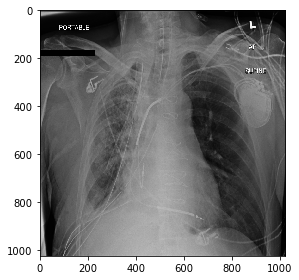

In [304]:
from skimage import io
img = io.imread('test_img.png')
img = np.asarray(img)
min_img = np.min(img)
max_img = np.max(img)
img = (img - min_img)/(max_img - min_img + 1e-4)
io.imshow(img)

## 4.3) CNN model definition (6 points)
Since now we can import images for model training, next step is to define a CNN model that you will use to train disease classification task. Any model requires us to select model parameters like how many layers, what is the kernel size, how many feature maps and so on. The number of possible models is infinite, but we need to make some design choices to start.  Lets design a CNN model with 3 convolutional layers, 3 residual units (similar to Figure 2 of https://arxiv.org/pdf/1512.03385.pdf) and a fully connected (FC) layer followed by a classification layer. Lets use 

-  3x3 convolution kernels (stride 1 in resnet units and stride 2 in convolutional layers)
-  ReLU for an activation function
-  max pooling with kernel 2x2 and stride 2 only after the convolutional layers. 

Define the number of feature maps in hidden layers as: 16, 16, 32, 32, 64,64,128 (1st layer, ..., 7th layer). 

<img src="HW2_picture3.png" height="100">

Write a class which specifies this network details. 

In [319]:
class Conv_model(nn.Module):
    def __init__(self, kernel_size = 3):
        super(Conv_model,self).__init__()
        ## Conv Block 1 ##
        self.conv1 = nn.Conv2d(1,16,kernel_size, stride = 2)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        ## Residual Block 1 ##
        self.res1conv1 = nn.Conv2d(16,16,kernel_size, stride = 1, padding = 1)
        self.res1relu1 = nn.ReLU()
        self.res1conv2 = nn.Conv2d(16,16,kernel_size, stride = 1, padding = 1)
        
        ## Conv Block 2 ##
        self.conv2 = nn.Conv2d(16,32,kernel_size, stride = 2)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        ## Residual Block 2 ##
        self.res2conv1 = nn.Conv2d(32,32,kernel_size, stride = 1, padding = 1)
        self.res2relu1 = nn.ReLU()
        self.res2conv2 = nn.Conv2d(32,32,kernel_size, stride = 1, padding = 1)
        
        ## Conv Block 3 ##
        self.conv3 = nn.Conv2d(32,64,kernel_size, stride = 2)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        ## Residual Block 3 ##
        self.res3conv1 = nn.Conv2d(64,64,kernel_size, stride = 1, padding = 1)
        self.res3relu1 = nn.ReLU()
        self.res3conv2 = nn.Conv2d(64,64,kernel_size, stride = 1, padding = 1)
        
        ## FC Layers ##
        self.fc = nn.Linear(16*16*64, 128)
        self.out = nn.Linear(128, 3)
        
    def forward(self,x):
        x = self.maxpool1(self.relu1(self.conv1(x)))
        residual = x
        x = self.res1conv2(self.res1relu(self.res1conv1(x)))
        x += residual
        x = self.maxpool2(self.relu2(self.conv2(x)))
        residual = x
        x = self.res1conv2(self.res1relu(self.res1conv1(x)))
        x += residual
        x = self.maxpool3(self.relu3(self.conv3(x)))
        residual = x
        x = self.res3conv2(self.res3relu(self.res3conv1(x)))
        x += residual
        x = self.linear(x.view(-1,16*16*64))
        x = self.out(x)
    
        return x

## 4.4) (2 point)
How many learnable parameters of this model has? How many learnable parameters we would have if we replace the fully connected layer with global average pooling layer (Take a look at Section 3.2 of https://arxiv.org/pdf/1312.4400.pdf)?  

In [320]:
model = Conv_model()
print(model)
count_parameters(model)

Conv_model(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (res1conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (res1relu1): ReLU()
  (res1conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (res2conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (res2relu1): ReLU()
  (res2conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (relu3): ReLU()
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (res3conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (res3relu1): ReLU()
  (res3conv2):

2217955

In [322]:
## sanity check
(((3*3*1)+1)*16)+2*(((3*3*16)+1)*16)+(((3*3*16)+1)*32)+2*(((3*3*32)+1)*32)+(((3*3*32)+1)*64)+2*(((3*3*64)+1)*64)+((16*16*64+1)*128)+((128+1)*3)

2217955

In [338]:
## replace fc with global average pooling layer
class Conv_model_gap(nn.Module):
    def __init__(self, kernel_size = 3):
        super(Conv_model_gap,self).__init__()
        ## Conv Block 1 ##
        self.conv1 = nn.Conv2d(1,16,kernel_size, stride = 2)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        ## Residual Block 1 ##
        self.res1conv1 = nn.Conv2d(16,16,kernel_size, stride = 1, padding = 1)
        self.res1relu1 = nn.ReLU()
        self.res1conv2 = nn.Conv2d(16,16,kernel_size, stride = 1, padding = 1)
        
        ## Conv Block 2 ##
        self.conv2 = nn.Conv2d(16,32,kernel_size, stride = 2)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        ## Residual Block 2 ##
        self.res2conv1 = nn.Conv2d(32,32,kernel_size, stride = 1, padding = 1)
        self.res2relu1 = nn.ReLU()
        self.res2conv2 = nn.Conv2d(32,32,kernel_size, stride = 1, padding = 1)
        
        ## Conv Block 3 ##
        self.conv3 = nn.Conv2d(32,64,kernel_size, stride = 2)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        ## Residual Block 3 ##
        self.res3conv1 = nn.Conv2d(64,64,kernel_size, stride = 1, padding = 1)
        self.res3relu1 = nn.ReLU()
        self.res3conv2 = nn.Conv2d(64,64,kernel_size, stride = 1, padding = 1)
        
        ## FC Layers ##
        self.gap = nn.AdaptiveAvgPool2d(128)
        self.out = nn.Linear(128, 3)
        
    def forward(self,x):
        x = self.maxpool1(self.relu1(self.conv1(x)))
        residual = x
        x = self.res1conv2(self.res1relu(self.res1conv1(x)))
        x += residual
        x = self.maxpool2(self.relu2(self.conv2(x)))
        residual = x
        x = self.res1conv2(self.res1relu(self.res1conv1(x)))
        x += residual
        x = self.maxpool3(self.relu3(self.conv3(x)))
        residual = x
        x = self.res3conv2(self.res3relu(self.res3conv1(x)))
        x += residual
        x = self.gap(x.view(-1,16*16*64))
        x = self.out(x)
    
        return x

In [339]:
model = Conv_model_gap()
print(model)
count_parameters(model)

Conv_model_gap(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (res1conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (res1relu1): ReLU()
  (res1conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (res2conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (res2relu1): ReLU()
  (res2conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (relu3): ReLU()
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (res3conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (res3relu1): ReLU()
  (res3con

120675

In [335]:
## sanity check
(((3*3*1)+1)*16)+2*(((3*3*16)+1)*16)+(((3*3*16)+1)*32)+2*(((3*3*32)+1)*32)+(((3*3*32)+1)*64)+2*(((3*3*64)+1)*64)+((128+1)*3)

120675

The number of learnable parameters is significantly reduced due to pooling at the last step rather than using a fully connected layer on a deep input.

## 4.5) Loss function and optimizer (2 points)
Define an appropriate loss criterion and an optimizer using pytorch. What type of loss function is applicable to our classification problem? Explain your choice of a loss function.  For an optimizer lets use Adam for now with default hyper-parmeters.

In [353]:
import torch.optim as optim
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
model = Conv_model()

In this case we can use multi-class cross entropy loss.

_Some background:_ In network architecture design, we want to have an architecture that has enough capacity to learn. We can achieve this by using large number of feature maps and/or many more connections and activation nodes. However, having a large number of learnable parameters can easily result in overfitting. To mitigate overfitting, we can keep the number of learnable parameters of the network small either using shallow networks or few feature maps. This approach results in underfitting that model can neither model the training data nor generalize to new data. Ideally, we want to select a model at the sweet spot between underfitting and overfitting. It is hard to find the exact sweet spot. 

We first need to make sure we have enough capacity to learn, without a capacity we will underfit. Here, you will need to check if designed model in 4.3. can learn or not. Since we do not need to check the generalization capacity (overfitting is OK for now since it shows learning is possible), it is a great strategy to use a subset of training samples. Also, using a subset of samples is helpful for debugging!!!

## 4.6) Train the network on a subset (6 points)
Lets use a script to take random samples from train set (HW2_trainSet.csv), lets name this set as HW2_randomTrainSet. Choose random samples from validation set (HW2_validationSet.csv), lets name this set as HW2_randomValidationSet. You used downsampling of images from 1024x1024 size to 64x64 in the Lab 4. This was fine for learning purpose but it will significantly reduce the infomation content of the images which is important especially in medicine. In this Homework, you MUST use original images of size 1024x1024 as the network input. 

In [340]:
# get samples from HW2_trainSet.csv
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('HW2_trainSet.csv')
_ , X_random, _, _ = train_test_split(df, df.Class, test_size=0.1, random_state=0)
print('Selected subset class frequencies\n',X_random['Class'].value_counts())
X_random.to_csv('HW2_randomTrainSet.csv',index=False)

df = pd.read_csv('HW2_validationSet.csv')
_ , X_random, _, _ = train_test_split(df, df.Class, test_size=0.1, random_state=0)
print('Selected subset class frequencies\n',X_random['Class'].value_counts())
X_random.to_csv('HW2_randomValidationSet.csv',index=False)

Selected subset class frequencies
 1    158
0     72
Name: Class, dtype: int64
Selected subset class frequencies
 1    20
0    13
Name: Class, dtype: int64


In [385]:
train_df_path = 'HW2_randomTrainSet.csv'
val_df_path = 'HW2_randomValidationSet.csv'
root_path = '/scratch/BMSC-GA-4493-2022sp/images'
BATCH_SIZE = 1
train_loader = DataLoader(ChestXrayDataset(train_df_path, root_path), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(ChestXrayDataset(val_df_path, root_path), batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
for samples, targets in train_loader:
    print(samples)

Use the random samples generated and write a script to train your network. Using the script train your network using your choice of weight initialization strategy. In case you need to define other hyperparameters choose them empirically, for example batch size. Plot average loss on your random sample set per epoch. (Stop the training after at most ~50 epochs) 

In [381]:
def train_model(model, train_loader, val_loader, lossFn, opt, epochs):
    # initialize a dictionary to store training history
    H = {"train_loss": [],"train_acc": [],"val_loss": [],"val_acc": []}
    # measure how long training is going to take
    print("[INFO] training the network...")
    startTime = time.time()
    for e in range(0, epochs):
        # set the model in training mode
        model.train()
        # initialize the total training and validation loss
        totalTrainLoss = 0
        totalValLoss = 0
        # initialize steps for train and val
        trainSteps = len(train_loader)
        valSteps = len(val_loader)
        # initialize the number of correct predictions in the training and validation step
        trainCorrect = 0
        valCorrect = 0
        # loop over the training set
        for (x, y) in train_loader:
            # send the input to the device
            (x, y) = (x.to(device), y.to(device))
            # perform a forward pass and calculate the training loss
            pred = model(x)
            loss = lossFn(pred, y)
            # zero out the gradients, perform the backpropagation step,
            # and update the weights
            opt.zero_grad()
            loss.backward()
            opt.step()
            # add the loss to the total training loss so far and calculate the number of correct predictions
            totalTrainLoss += loss
            trainCorrect += (pred.argmax(1) == y).type(torch.float).sum().item()
            
        # switch off autograd for evaluation
        with torch.no_grad():
            # set the model in evaluation mode
            model.eval()
            # loop over the validation set
            for (x, y) in val_loader:
                # send the input to the device
                (x, y) = (x.to(device), y.to(device))
                # make the predictions and calculate the validation loss
                pred = model(x)
                totalValLoss += lossFn(pred, y)
                # calculate the number of correct predictions
                valCorrect += (pred.argmax(1) == y).type(torch.float).sum().item()       
        # calculate the average training and validation loss        
        avgTrainLoss = totalTrainLoss / trainSteps
        avgValLoss = totalValLoss / valSteps
        # calculate the training and validation accuracy
        trainCorrect = trainCorrect / len(train_loader.dataset)
        valCorrect = valCorrect / len(val_loader.dataset)
        # update our training history
        H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())
        H["train_acc"].append(trainCorrect)
        H["val_loss"].append(avgValLoss.cpu().detach().numpy())
        H["val_acc"].append(valCorrect)
        # print the model training and validation information
        print("[INFO] EPOCH: {}/{}".format(e + 1, epochs))
        print("Train loss: {:.6f}, Train accuracy: {:.4f}".format(avgTrainLoss, trainCorrect))
        print("Val loss: {:.6f}, Val accuracy: {:.4f}\n".format(avgValLoss, valCorrect))
    return model, H

In [36]:
model = Conv_model().to(device)
model, metrics = train_model(model, train_loader, val_loader, loss, optimizer, 50)

In [ ]:
# plot the training/validation loss and accuracy
plt.figure()
plt.plot(metrics["train_loss"], label="train_loss")
plt.plot(metrics["val_loss"], label="val_loss")
plt.plot(metrics["train_acc"], label="train_acc")
plt.plot(metrics["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

## 4.7) Analysis of training using a CNN model(2 points)
Describe your findings. Can your network learn from small subset of random samples? Does CNN model have enough capacity to learn with your choice of emprical hyperparameters?
-  If yes, how will average loss plot will change if you multiply the learning rate by 10?
-  If no, how can you increase the model capacity? Increase your model capacity and train again until you find a model with enough capacity. If the capacity increase is not sufficient to learn, think about empirical parameters you choose in designing your network and make some changes on your selection. Describe what type of changes you made to your original network and how can you manage this model to learn.

A larger learning rate would cause the model to converge to minima quicker, but at the cost of choosing optimal weights, so this may not exactly improve accuracy, although there is a sweet spot. To increase model capacity given the limited subset of examples, we could increase the number of layers or depth in the model, in addition to running multiple pooling blocks in addition to the residual blocks. Other techniques on a data level would be augmentation, such as rotations, translations, jitters, etc. or on a parameter level, some type of cross validation framework. 

## 4.8) Hyperparameters (3 points )
Now, we will revisit our selection of CNN model architecture, training parameters and so on: i.e. hyperparameters. In your investigations, define how you will change the hyperparameter in the light of model performance using previous hyperparameters. Provide your rationale choosing the next hyperparameter. Provide learning loss and accuracy curves, and model performance in HW2_randomValidationSet. You will use macro AUC as the performance metric for comparing CNN models for disease classification task.  Report macro AUC for each CNN model with different hyperparameters (Check http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#multiclass-settings).

Investigate the effect of learning rate and batch size in the model performance (try atleast 4 learning rates and 4 batch sizes) and select optimal values for both. You only need to put your best result here.

## 4.9) Train the network on the whole dataset (5 points)
After question 4.7., you should have a network which has enough capacity to learn and you were able to debug your training code so that it is now ready to be trained on the whole dataset. Use the best batch size and learning rate from 4.8. Train your network on the whole train set (HW2_trainSet_new.csv) and check the validation loss on the whole validation set (HW2_validationSet_new.csv) in each epoch. Plot average loss and accuracy on train and validation sets. Describe your findings. Do you see overfitting or underfitting to train set? What else you can do to mitigate it?

## 4.10) Experiments with Resnet18

Let's use Resnet18 on our dataset and see how it performs. We can import the standard architectures directly using PyTorch's torchvison.models module. Refer to https://pytorch.org/docs/stable/torchvision/models.html to see all available models in PyTorch. You'll later, in this course, learn about a convenient and useful concept known as Transfer Learning. For now, we will  use the Resnet18 and train the architecture from scratch without any pre-training. Here is the link for the ResNet paper: https://arxiv.org/pdf/1512.03385.pdf 

### 4.10.1) (2 Point)

What is the reason of using 1x1 convolutions before 3x3 convolutions in the resnet architecture?

### 4.10.2) Train the ResNet18 on the whole dataset

We provide a new dataset class and a few additional transformations to the data for this new architecture. We have a new dataset class as ResNet18 architectures expect 3 channels in their primary input and other reasons which you'll later come to know - after the lecture on transfer learning. Nevertheless, for our case, we use them to reduce the required GPU usage as the Resnet18 architecture is significantly complex and GPU memory-intensive architecture than the CNN implemented above.

In [6]:
from torchvision import transforms
# torchvision models are trained on input images normalized to [0 1] range .ToPILImage() function achives this
# additional normalization is required see: http://pytorch.org/docs/master/torchvision/models.html

train_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomResizedCrop(896),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

validation_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.CenterCrop(896),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

class ChestXrayDataset_ResNet(Dataset):
    """Chest X-ray dataset from https://nihcc.app.box.com/v/ChestXray-NIHCC."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file filename information.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data_frame = load_data_and_get_class(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.data_frame.iloc[idx, 0])
        
        image = io.imread(img_name)
        if len(image.shape) > 2 and image.shape[2] == 4:
            image = image[:,:,0]
            
        image=np.repeat(image[None,...],3,axis=0)
            
        image_class = self.data_frame.iloc[idx, -1]

        if self.transform:
            image = self.transform(image)
            
        sample = {'x': image, 'y': image_class}

        return sample

def load_data_and_get_class(path_to_data):
    data = pd.read_csv(path_to_data)
    encoder = LabelEncoder()
    data['Class'] = encoder.fit_transform(data['Finding Labels'])
    return data

### 4.10.3) Architecture modification (5 points) 
In this question you need to develop a CNN model based on Resnet18 architecture. Please import the original ResNet18 model from PyTorch models (You can also implement this model by your own using the resnet paper). Modify the architecture so that the model will work with full size 1024x1024 image inputs and 3 classes of our interest:
- 0 cardiomegaly
- 1 pneumothorax
- 2 infiltration

Make sure the model you developed uses random weights!

In [38]:
import torchvision.models as models
resnet18 = models.resnet18()

In [39]:
from PIL import Image

def resize(path):
    dim = 224
    img = Image.open(path)
    hpercent = (dim / float(img.size[1]))
    width = int((float(img.size[0]) * float(hpercent)))
    img = img.resize((width, dim), Image.ANTIALIAS)
    return img

### 4.10.4) Train the network on the whole dataset (5 points)
Similar to section 4.7. train the model you developed in section 4.9.2.a on the whole train set (HW2_trainSet_new.csv) and check the validation loss on the whole validation set (HW2_validationSet_new.csv) in each epoch. Plot average loss and accuracy on train and validation sets. Describe your findings. Do you see overfitting or underfitting to train set? What else you can do to mitigate it?

# 5) Analysis of the results from two networks trained on the full dataset (Total 5 points + Bonus Question Maximum 10 points)
Use the validation loss to choose models from Q4.9 (model1) and Q4.10 (model2) (These models are trained on the full dataset and they learned from train data and generalized well to the validation set). 

## 5.1) Model selection by performance on test set (5 Points)
Using these models, plot confusion matrix and ROC curve for the disease classifier on the test set (HW2_TestSet_new.csv). Report AUC for this CNN model as the performance metric. You will have two confusion matrices and two ROC curves to compare model1 and model2

In [7]:
# This is the place we predict the disease from a model trained, output for this function is 
#the target values and probabilty of each image having a disease 

# Example of how to plot ROC curves
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

# Example of how to calculate confusion matrix
# https://www.kaggle.com/grfiv4/plot-a-confusion-matrix



## 5.2) Understanding the network ( Bonus Question maximum 10 points)



### 5.2.a Occlusion (5 points)
Using the best performing model (choose the model using the analysis you performed on Q5.1), we will figure out where our network gathers infomation to decide the class for the image. One way of doing this is to occlude parts of the image and run through your network. By changing the location of the ocluded region we can visualize the probability of image being in one class as a 2-dimensional heat map. Using the best performing model, provide the heat map of the following images: HW2_visualize.csv. Do the heap map and bounding box for pathologies provide similar information? Describe your findings.
Reference: https://arxiv.org/pdf/1311.2901.pdf

In [8]:
# You can use the code from: https://github.com/thesemicolonguy/convisualize_nb/blob/master/cnn-visualize.ipynb 


### 5.2.b GradCAM (5 points)
An alternative approach to model interpretation is gradcam. Go through https://arxiv.org/pdf/1610.02391.pdf and create heatmaps of images in HW2_visualize.csv using this method. Repeat the analysis in 5.2.a and also compare the time-taken to generate occlusions and gradcams